In [18]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("tiktok.db")

cmd = \
    f"""
    SELECT id, video_title, sound_transcribed, upload_time, view
    FROM tiktok
    """ 
    
tiktoks = pd.read_sql_query(cmd, conn)
    
conn.close()

In [3]:
tiktoks.head()

,id,video_title,sound_transcribed,upload_time,view
0,7037034323417107759,EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...,NA,https://v16-webapp.tiktok.com/c236514e9e9afb02...,63900000
1,7059020753978789166,🐈Are you envious? #fy #kitty #cat #love #kiss,NA,https://v16-webapp.tiktok.com/19acdfd3ecbceb5f...,5400000
2,7061272988615707950,Fyp,Bonanza,https://v16-webapp.tiktok.com/e4d4117e4cd54b88...,3800000
3,7039714932283362607,100% the truth! ❤️,beautiful,https://v16-webapp.tiktok.com/66467801dcb7df68...,37900000
4,7056048829749218607,,NA,https://v16-webapp.tiktok.com/fd0801d14a758eef...,8300000


In [4]:
audio_tiktoks = tiktoks[tiktoks["sound_transcribed"] != "NA"]
audio_tiktoks = audio_tiktoks.drop_duplicates(subset='id')
audio_tiktoks.shape

(135, 5)

In [5]:
audio_tiktoks["video_title"]

2                                                     Fyp
3                                      100% the truth! ❤️
7                                                        
8       she really tried to kick us off the plane.😂😂 @...
10             Roni does another TikTok #dance! #flipbook
                              ...                        
1264                Happy Valentines Day Lynja Turtles 🥰🥰
1280    الاغنيه ادمان❤️‍🔥 مش عم تتطلع من راسي😪😂#أم_غما...
1288             She still alive #malinois #crazyforfetch
1292    d joke. need ko money now HAHAHAHAHAHA #mobile...
1296                 tried the most softest look kSKSKSKS
Name: video_title, Length: 135, dtype: object

In [6]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
for title in audio_tiktoks["video_title"][:10]:
    sid = SentimentIntensityAnalyzer()
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Fyp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
100% the truth! ❤️
compound: 0.3802, neg: 0.0, neu: 0.607, pos: 0.393, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
she really tried to kick us off the plane.😂😂 @theskimaskgirl
compound: 0.7003, neg: 0.139, neu: 0.584, pos: 0.277, 
Roni does another TikTok #dance! #flipbook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
#cute #dog
compound: 0.4588, neg: 0.0, neu: 0.25, pos: 0.75, 
MANY PPL ASKED. <3 GTG TO SCHOOL #fyp #foryou #tysm #A+K
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
How Tiktok behind the scenes are… 😂 @coreyscherer
compound: 0.4404, neg: 0.121, neu: 0.637, pos: 0.242, 
He just want to hangout w me and all I do is bully him 😔 #foryou #fyp #baby #brother
compound: -0.3818, neg: 0.14, neu: 0.746, pos: 0.114, 
#trending #fyp #manga #anime #killua #animetiktok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


In [8]:
ss = [SentimentIntensityAnalyzer().polarity_scores(title) for title in audio_tiktoks["video_title"]]
ss[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [9]:
import collections

add_dict = collections.Counter({'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})

for s in ss:
    counter = collections.Counter(s)
    add_dict += counter
    dict_ss = dict(add_dict)
    
dict_ss

{'neu': 93.56899999999997,
 'pos': 19.968999999999994,
 'compound': 25.9948,
 'neg': 6.465}

In [10]:
len(ss)

135

In [11]:
# take the average score
for k in dict_ss.keys():
    dict_ss[k] = dict_ss[k]/len(ss)

dict_ss

{'neu': 0.6931037037037036,
 'pos': 0.14791851851851848,
 'compound': 0.19255407407407407,
 'neg': 0.04788888888888889}

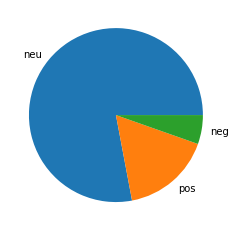

In [12]:
import matplotlib.pyplot as plt

dict_data = dict_ss.copy()
dict_data.pop('compound')
plt.pie(dict_data.values(), labels=dict_data.keys())
plt.show()

In [13]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

titles = tiktoks["video_title"]
hashtags = hashtag_extract(titles)
hashtags[:10]

NameError: name 're' is not defined

In [14]:
hashtags = sum(hashtags, [])
hashtags[:10]

NameError: name 'hashtags' is not defined

In [15]:
import pandas as pd
series = pd.Series(hashtags)
freq = series.value_counts()
df = pd.DataFrame(freq[:10]).reset_index()
df = df.rename(columns={"index": "hashtag", 0: "frequency"})

NameError: name 'hashtags' is not defined

In [16]:
ss_h = [SentimentIntensityAnalyzer().polarity_scores(h) for h in df["hashtag"]]
compound_h = [ss_h[i]['compound'] for i in range(len(ss_h))]
df['score'] = compound_h
df

NameError: name 'df' is not defined

In [17]:
import numpy as np
import re
import wordsegment
from wordsegment import load, segment
load()

def clean_tiktok_df(tiktoks):
    
    #remove duplicates
    dups = tiktoks['id'].duplicated(keep = 'last') #keep the most recent version of the tiktok
    tiktoks = tiktoks[np.invert(dups)]
    tiktoks = tiktoks.reset_index(drop = True)
    
    #remove rows with no video_title and no sound_transcribed
    tiktoks = tiktoks[(tiktoks["sound_transcribed"] != 'NA') | (tiktoks["video_title"] != '')]
    
    #replace 'NA' in sound_transcribed with ''
    tiktoks["sound_transcribed"] = [sound if sound != 'NA' else '' for sound in tiktoks["sound_transcribed"]]
    tiktoks = tiktoks.reset_index(drop = True)
    
    #replace hashtag phrase with predicted phrase with spaces added
    tiktoks['hashtags'] = [re.findall(r"#(\w+)",x) for x in tiktoks['video_title'] ] #create col for list of hashtag phrases
    tiktoks['predicted_hashtag_words'] = [segment(' '.join(x)) for x in tiktoks['hashtags']] #create col for list of predicted phrases of each hashtag
    tiktoks['predicted_hashtag_words'] = [' '.join(x) for x in tiktoks['predicted_hashtag_words']] #list -> string
    tiktoks['video_title'] = [re.sub("#[A-Za-z0-9_]+","", x) for x in tiktoks['video_title']] #remove hashtagged phrases from title
    tiktoks['video_title'] = tiktoks['video_title'] + tiktoks['predicted_hashtag_words'] #new title where hashtag phrases are replaced with their predicted words
   
    #combine title and sound_transcribed
    tiktoks['title_and_sound'] = tiktoks['video_title'] + ' ' + tiktoks['sound_transcribed']
    return tiktoks

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment(tiktoks):
    #combine title and sound_transcribed
    tiktoks['title_and_sound'] = tiktoks['video_title'] + ' ' + tiktoks['sound_transcribed']
    sid = SentimentIntensityAnalyzer()

    tiktoks['Negative Sentiment'] = tiktoks['title_and_sound'].apply(lambda x: sid.polarity_scores(x)['neg'])
    tiktoks['Neutral Sentiment'] = tiktoks['title_and_sound'].apply(lambda x: sid.polarity_scores(x)['neu'])
    tiktoks['Positive Sentiment'] = tiktoks['title_and_sound'].apply(lambda x: sid.polarity_scores(x)['pos'])
    tiktoks['Compound Sentiment'] = tiktoks['title_and_sound'].apply(lambda x: sid.polarity_scores(x)['compound'])
    return tiktoks

In [20]:
import collections

def sent_scores(tiktoks):
    ss = [SentimentIntensityAnalyzer().polarity_scores(text) for text in tiktoks['title_and_sound']]
    add_dict = collections.Counter({'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})
    # add up all the sentiment scores of all the tiktoks
    for s in ss:
        counter = collections.Counter(s)
        add_dict += counter
    dict_ss = dict(add_dict)
    # take the average score
    for k in dict_ss.keys():
        dict_ss[k] = dict_ss[k]/len(ss)

    return dict_ss

In [25]:
import matplotlib.pyplot as plt
from plotly import express as px

def make_piechart(tiktoks):
    tiktoks = clean_tiktok_df(tiktoks)
    dict_data = sent_scores(tiktoks).copy()
    dict_data.pop('compound')
    df_data = pd.DataFrame([{'sentiment': x, 'score': y} for x,y in dict_data.items()])
    fig = px.pie(df_data, 
                 names='sentiment', 
                 values='score', 
                 title='Sentiment Analysis of Trending Tiktoks', 
                 template = 'plotly_dark', 
                 color_discrete_sequence = ['rgb(255,255,255)', 'rgb(0,242,234)', 'rgb(255,0,80)'],
                 width = 800,
                 height = 600)
    return fig
    
fig = make_piechart(tiktoks)
fig.show()